# Image Classification Project

In [1]:
#Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.cm as cm
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras import optimizers
import os
from os import listdir
import shutil
import random
import scipy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image

In [2]:
#Lets create a make_dir function which automatically create the test,train and augmented datesets and their labels folder Saree,jeans and trousers into them.
def make_dir(directory):
    
    if os.path.exists(directory):
        shutil.rmtree(directory)
    os.makedirs(directory)

make_dir('saree_dir_train')
make_dir('jean_dir_train')
make_dir('trouser_dir_train')

make_dir('saree_dir_test')
make_dir('jean_dir_test')
make_dir('trouser_dir_test')

make_dir('saree_dir_aug')
make_dir('jean_dir_aug')
make_dir('trouser_dir_aug')






In [35]:
#lets define the paths labels(Sarees,jeans,trousers) of test and train datasets

#Train
saree_dir_train = "./clothes/train/Saree"
jean_dir_train = "./clothes/train/Jeans"
trouser_dir_train = "./clothes/train/Trousers"

#Test
saree_dir_test = "./clothes/test/Saree"
jean_dir_test = "./clothes/test/Jeans"
trouser_dir_test = "./clothes/test/Trousers"


In [36]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
my_data_dir = './clothes'
os.listdir(my_data_dir) 

['test', 'train']

In [37]:
# Get filenames in list
Dir=['\\test\\','\\train\\']
for i,dir1 in enumerate(Dir):
    path = my_data_dir+dir1
    p=os.listdir(path)
    print(i,p)


0 ['Jeans', 'Saree', 'Trousers']
1 ['Jeans', 'Saree', 'Trousers']


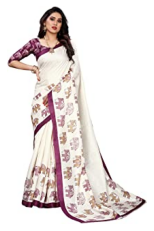

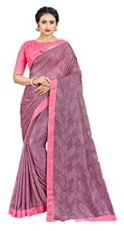

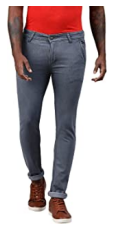

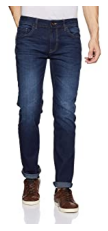

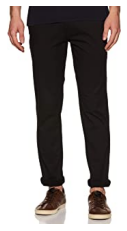

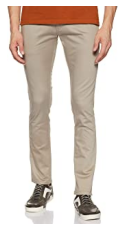

In [38]:
#lets see first two images of each  saree_dir_train, jean_dir_train, trouser_dir_train dataset
Dir=[saree_dir_train, jean_dir_train, trouser_dir_train]

import matplotlib.image as mpimg
for di in Dir:
    k=listdir(di)
    for i in k[:2]:
        img=mpimg.imread('{}/{}'.format(di,i))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

In [39]:
print("no of images of saree in train dataset ",len(os.listdir(saree_dir_train)))
print("no of images of shirts in train dataset ",len(os.listdir(jean_dir_train)))
print("no of images of t-shirts in train dataset ",len(os.listdir(trouser_dir_train)))

print("no of images of saree in test dataset ",len(os.listdir(saree_dir_test)))
print("no of images of shirts in test dataset ",len(os.listdir(jean_dir_test)))
print("no of images of t-shirts in test dataset ",len(os.listdir(trouser_dir_test)))



no of images of saree in train dataset  208
no of images of shirts in train dataset  180
no of images of t-shirts in train dataset  258
no of images of saree in test dataset  40
no of images of shirts in test dataset  40
no of images of t-shirts in test dataset  40


# Training our model

In [41]:
input_shape=(128,128,3)
img_width=128
img_height=128

batch_size=12
epoch=100

train_data_dir='./clothes/train'
validation_data_dir='./clothes/test'

nb_train_samples=167
nb_validation_samples=40

model=Sequential()

# This is the first convolution

model.add(Conv2D(32,(3,3),padding='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# This is the Second convolution

model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# This is the third convolution

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# This is the fourth convolution

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Flatten the results to feed into a DNN


model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))
print(model.summary())


model.compile(loss='categorical_crossentropy',optimizer = RMSprop(learning_rate = 0.001),metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
activation_18 (Activation)   (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
activation_19 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 32, 32, 32)       

# Data Augmentation

In [42]:
# Creating our data generator for our training data
train_generator_augmented=ImageDataGenerator(
                               rotation_range=30, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1./255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                            )

# Data Pre-processing

In [43]:
# Validation
Data_gen=ImageDataGenerator(
    # used to rescale the pixel values from [0, 255] to [0, 1] interval
    rescale=1./255)
validation_generator=Data_gen.flow_from_directory(validation_data_dir,
                                                  target_size=(img_width,img_height),
                                                  batch_size=32, 
                                                  class_mode='categorical',
                                                 shuffle=False)

# Training

train_generator=train_generator_augmented.flow_from_directory(train_data_dir,
                                                              target_size=(img_width,img_height),
                                                              batch_size=batch_size, 
                                                              class_mode='categorical')



Found 120 images belonging to 3 classes.
Found 646 images belonging to 3 classes.


In [44]:
# checking class indices
train_generator.class_indices

{'Jeans': 0, 'Saree': 1, 'Trousers': 2}

# EarlyStopping and ModelCheckpoint

In [45]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# Training

In [46]:
history = model.fit(
    train_generator, 
    epochs=epoch,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size,
    steps_per_epoch=nb_train_samples//batch_size,
    callbacks=[es, mc]
  
)

Epoch 1/100
13/13 [==============================] - 8s 494ms/step - loss: 1.3677 - accuracy: 0.3782 - val_loss: 1.0896 - val_accuracy: 0.4167

Epoch 00001: val_accuracy improved from -inf to 0.41667, saving model to best_model.h5
Epoch 2/100
13/13 [==============================] - 5s 357ms/step - loss: 1.0943 - accuracy: 0.4359 - val_loss: 1.1232 - val_accuracy: 0.1667

Epoch 00002: val_accuracy did not improve from 0.41667
Epoch 3/100
13/13 [==============================] - 4s 328ms/step - loss: 1.0647 - accuracy: 0.4615 - val_loss: 1.0600 - val_accuracy: 0.5833

Epoch 00003: val_accuracy improved from 0.41667 to 0.58333, saving model to best_model.h5
Epoch 4/100
13/13 [==============================] - 5s 399ms/step - loss: 0.9700 - accuracy: 0.5256 - val_loss: 0.8891 - val_accuracy: 0.7812

Epoch 00004: val_accuracy improved from 0.58333 to 0.78125, saving model to best_model.h5
Epoch 5/100
13/13 [==============================] - 4s 322ms/step - loss: 0.7876 - accuracy: 0.6346 -

In [47]:
#saving our model
#Save our model
from tensorflow.keras.models import load_model
model.save('best_model.h5')

In [48]:
losses = pd.DataFrame(model.history.history)
losses

loss  accuracy  val_loss  val_accuracy
0   1.367717  0.378205  1.089632      0.416667
1   1.094335  0.435897  1.123187      0.166667
2   1.064728  0.461538  1.060041      0.583333
3   0.970046  0.525641  0.889132      0.781250
4   0.787574  0.634615  0.847837      0.625000
..       ...       ...       ...           ...
77  0.587525  0.814103  0.263357      0.906250
78  0.251201  0.902597  0.225921      0.895833
79  0.321486  0.865385  0.249084      0.895833
80  0.365542  0.846154  0.230393      0.916667
81  0.477936  0.826923  0.289129      0.885417

[82 rows x 4 columns]

# Plotting model accuracy and loss

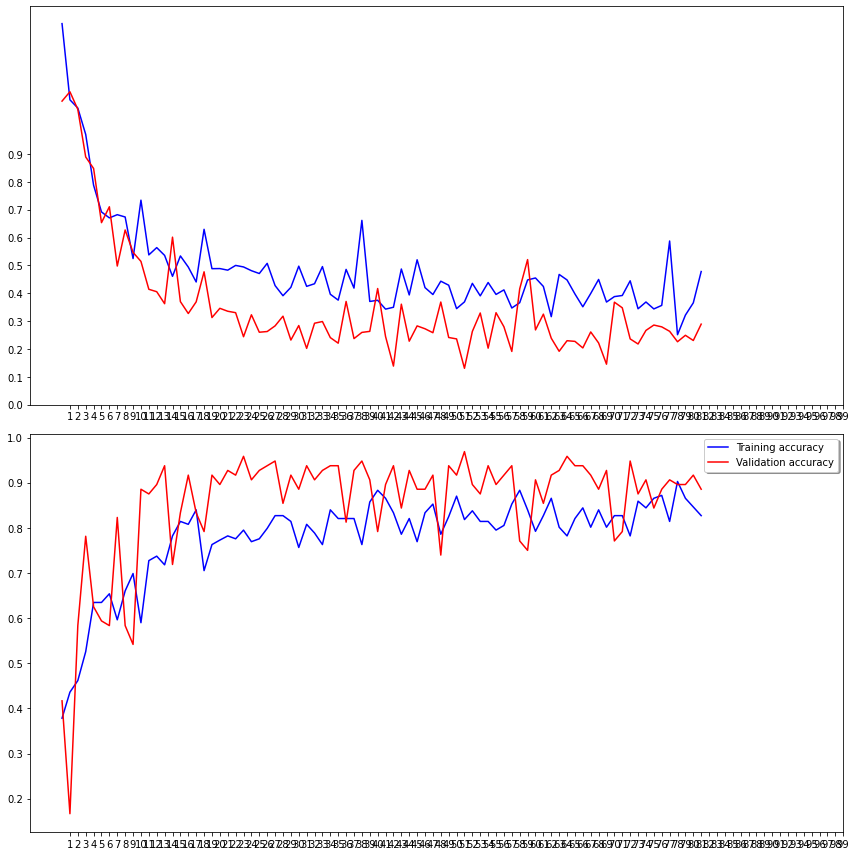

In [49]:
#Virtualize Training
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epoch, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epoch, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [50]:
#lets evaluate our model
model.evaluate(validation_generator)

4/4 [==============================] - 1s 133ms/step - loss: 0.3017 - accuracy: 0.9083


[0.30165496468544006, 0.9083333611488342]

In [51]:
# As we can see that there are 3 classes for the test images
validation_generator.classes


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Predicting the test images

In [52]:
pred = model.predict(validation_generator)

y_classes = pred.argmax(axis=-1)
print(y_classes)
res = pd.DataFrame()
res['ImageId'] = list(range(1,121))
res['Predicted_Label'] = y_classes
res['Actual_Label']=validation_generator.classes
res.head(50)
#res.to_csv("output.csv", index = False)

[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 0 2 2 0 0 0 0 0 2 2 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]


ImageId  Predicted_Label  Actual_Label
0         1                2             0
1         2                0             0
2         3                0             0
3         4                0             0
4         5                0             0
5         6                0             0
6         7                0             0
7         8                0             0
8         9                0             0
9        10                0             0
10       11                0             0
11       12                0             0
12       13                0             0
13       14                0             0
14       15                0             0
15       16                0             0
16       17                0             0
17       18                0             0
18       19                0             0
19       20                0             0
20       21                2             0
21       22                0             0
22       23                2             0
23       24                2             0
24       25                2             0
25       26                0             0
26       27                2             0
27       28                2             0
28       29                0             0
29       30                0             0
30       31                0             0
31       32                0             0
32       33                0             0
33       34                2             0
34       35                2             0
35       36                0             0
36       37                0             0
37       38                0             0
38       39                0             0
39       40                0             0
40       41                1             1
41       42                1             1
42       43                1             1
43       44                1             1
44       45                1             1
45       46                1             1
46       47                1             1
47       48                1             1
48       49                1             1
49       50                1             1

In [53]:
# Confusion Matrix and Classification Report

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}


Y_pred = model.predict(validation_generator, nb_validation_samples)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[31  0  9]
 [ 0 38  2]
 [ 0  0 40]]
Classification Report
              precision    recall  f1-score   support

       Jeans       1.00      0.78      0.87        40
       Saree       1.00      0.95      0.97        40
    Trousers       0.78      1.00      0.88        40

    accuracy                           0.91       120
   macro avg       0.93      0.91      0.91       120
weighted avg       0.93      0.91      0.91       120



In [55]:
#Lets load our model
from keras.models import load_model

saved_model = load_model('best_model.h5')

Input Image is: img _Sarees420.jpeg


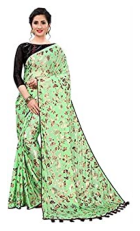

Predicted Label is: [1] 

Input Image is: img _Sarees421.jpeg


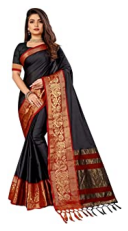

Predicted Label is: [1] 

Input Image is: img _Sarees422.jpeg


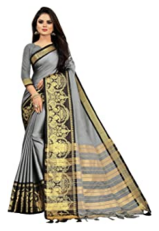

Predicted Label is: [1] 

Input Image is: img _Sarees423.jpeg


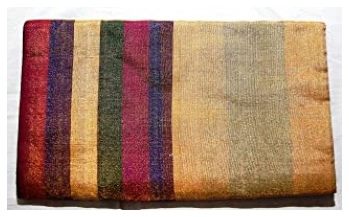

Predicted Label is: [1] 

Input Image is: img _Sarees424.jpeg


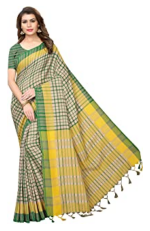

Predicted Label is: [1] 

Input Image is: img _Sarees425.jpeg


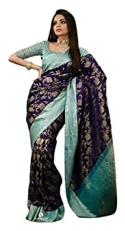

Predicted Label is: [1] 

Input Image is: img _Sarees426.jpeg


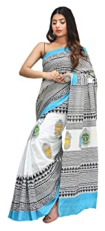

Predicted Label is: [1] 

Input Image is: img _Sarees427.jpeg


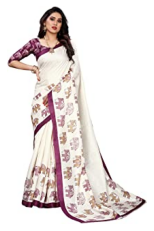

Predicted Label is: [2] 

Input Image is: img _Sarees428.jpeg


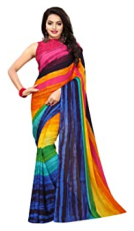

Predicted Label is: [1] 

Input Image is: img _Sarees429.jpeg


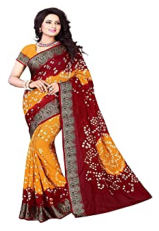

Predicted Label is: [1] 

Input Image is: img _Sarees430.jpeg


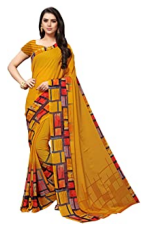

Predicted Label is: [1] 

Input Image is: img _Sarees431.jpeg


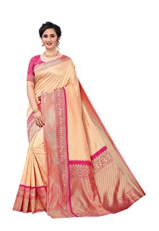

Predicted Label is: [1] 

Input Image is: img _Sarees432.jpeg


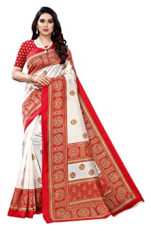

Predicted Label is: [1] 

Input Image is: img _Sarees433.jpeg


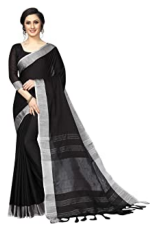

Predicted Label is: [1] 

Input Image is: img _Sarees434.jpeg


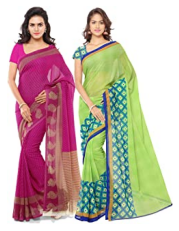

Predicted Label is: [1] 

Input Image is: img _Sarees435.jpeg


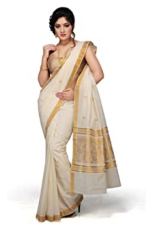

Predicted Label is: [1] 

Input Image is: img _Sarees436.jpeg


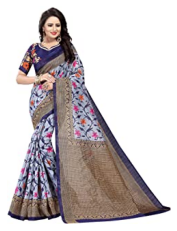

Predicted Label is: [1] 

Input Image is: img _Sarees437.jpeg


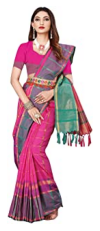

Predicted Label is: [1] 

Input Image is: img _Sarees438.jpeg


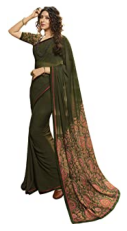

Predicted Label is: [1] 

Input Image is: img _Sarees439.jpeg


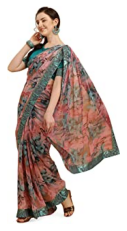

Predicted Label is: [1] 

Input Image is: img _Sarees440.jpeg


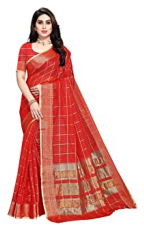

Predicted Label is: [1] 

Input Image is: img _Sarees441.jpeg


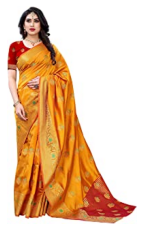

Predicted Label is: [1] 

Input Image is: img _Sarees442.jpeg


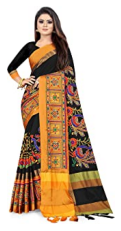

Predicted Label is: [1] 

Input Image is: img _Sarees443.jpeg


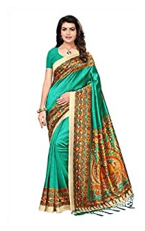

Predicted Label is: [1] 

Input Image is: img _Sarees444.jpeg


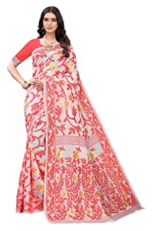

Predicted Label is: [1] 

Input Image is: img _Sarees445.jpeg


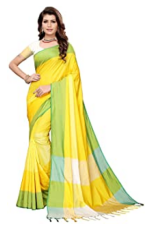

Predicted Label is: [1] 

Input Image is: img _Sarees446.jpeg


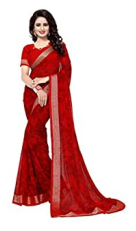

Predicted Label is: [1] 

Input Image is: img _Sarees447.jpeg


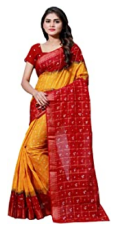

Predicted Label is: [1] 

Input Image is: img _Sarees448.jpeg


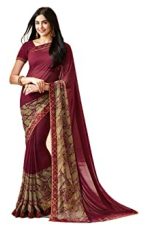

Predicted Label is: [1] 

Input Image is: img _Sarees449.jpeg


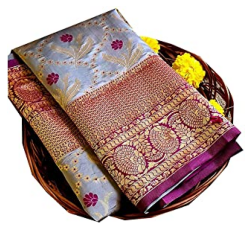

Predicted Label is: [1] 

Input Image is: img _Sarees450.jpeg


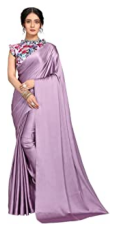

Predicted Label is: [1] 

Input Image is: img _Sarees451.jpeg


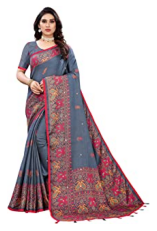

Predicted Label is: [1] 

Input Image is: img _Sarees452.jpeg


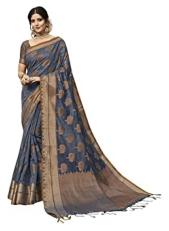

Predicted Label is: [1] 

Input Image is: img _Sarees453.jpeg


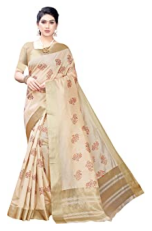

Predicted Label is: [1] 

Input Image is: img _Sarees454.jpeg


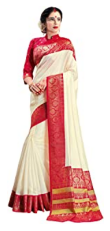

Predicted Label is: [1] 

Input Image is: img _Sarees455.jpeg


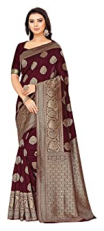

Predicted Label is: [1] 

Input Image is: img _Sarees456.jpeg


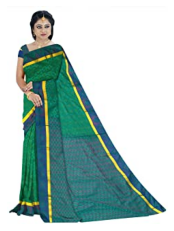

Predicted Label is: [1] 

Input Image is: img _Sarees457.jpeg


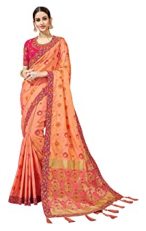

Predicted Label is: [1] 

Input Image is: img _Sarees458.jpeg


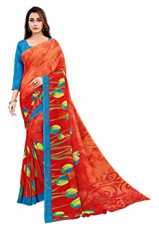

Predicted Label is: [1] 

Input Image is: img _Sarees459.jpeg


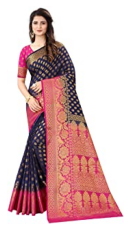

Predicted Label is: [1] 

Input Image is: img _Jeans317.jpeg


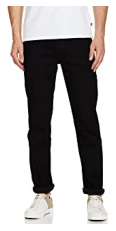

Predicted Label is: [2] 

Input Image is: img _Jeans318.jpeg


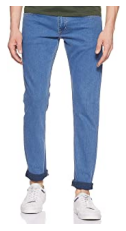

Predicted Label is: [0] 

Input Image is: img _Jeans319.jpeg


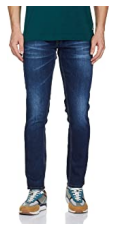

Predicted Label is: [0] 

Input Image is: img _Jeans320.jpeg


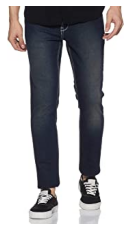

Predicted Label is: [0] 

Input Image is: img _Jeans321.jpeg


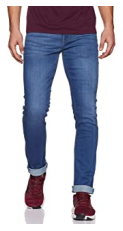

Predicted Label is: [0] 

Input Image is: img _Jeans322.jpeg


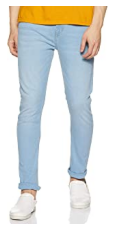

Predicted Label is: [0] 

Input Image is: img _Jeans323.jpeg


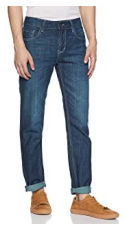

Predicted Label is: [0] 

Input Image is: img _Jeans324.jpeg


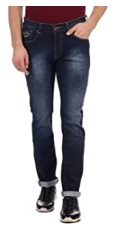

Predicted Label is: [0] 

Input Image is: img _Jeans325.jpeg


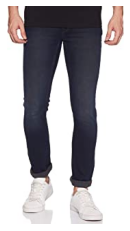

Predicted Label is: [0] 

Input Image is: img _Jeans326.jpeg


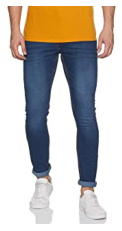

Predicted Label is: [0] 

Input Image is: img _Jeans327.jpeg


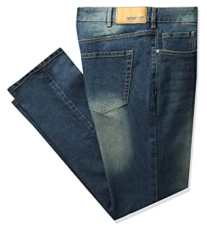

Predicted Label is: [0] 

Input Image is: img _Jeans328.jpeg


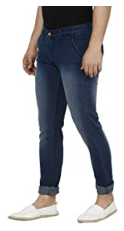

Predicted Label is: [0] 

Input Image is: img _Jeans329.jpeg


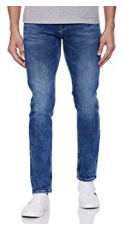

Predicted Label is: [0] 

Input Image is: img _Jeans330.jpeg


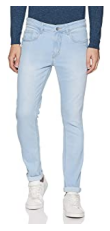

Predicted Label is: [0] 

Input Image is: img _Jeans331.jpeg


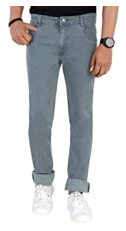

Predicted Label is: [0] 

Input Image is: img _Jeans332.jpeg


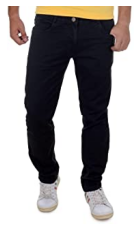

Predicted Label is: [0] 

Input Image is: img _Jeans333.jpeg


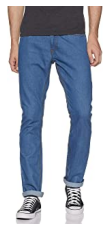

Predicted Label is: [0] 

Input Image is: img _Jeans334.jpeg


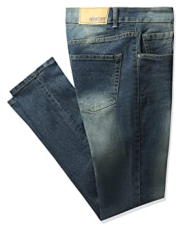

Predicted Label is: [0] 

Input Image is: img _Jeans335.jpeg


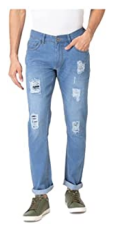

Predicted Label is: [0] 

Input Image is: img _Jeans336.jpeg


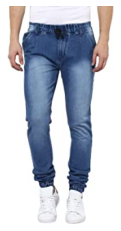

Predicted Label is: [0] 

Input Image is: img _Jeans337.jpeg


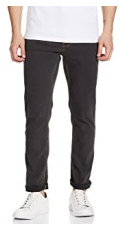

Predicted Label is: [2] 

Input Image is: img _Jeans338.jpeg


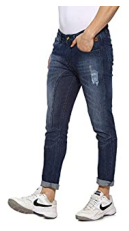

Predicted Label is: [0] 

Input Image is: img _Jeans339.jpeg


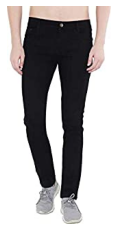

Predicted Label is: [0] 

Input Image is: img _Jeans340.jpeg


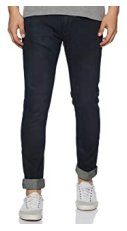

Predicted Label is: [0] 

Input Image is: img _Jeans341.jpeg


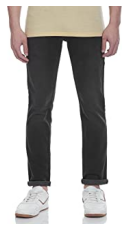

Predicted Label is: [2] 

Input Image is: img _Jeans342.jpeg


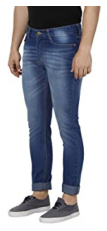

Predicted Label is: [0] 

Input Image is: img _Jeans343.jpeg


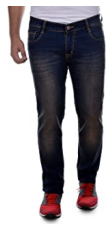

Predicted Label is: [0] 

Input Image is: img _Jeans344.jpeg


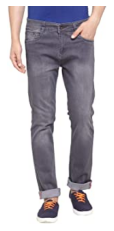

Predicted Label is: [2] 

Input Image is: img _Jeans345.jpeg


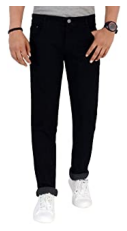

Predicted Label is: [0] 

Input Image is: img _Jeans346.jpeg


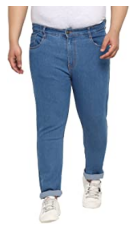

Predicted Label is: [0] 

Input Image is: img _Jeans347.jpeg


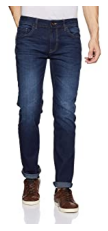

Predicted Label is: [0] 

Input Image is: img _Jeans348.jpeg


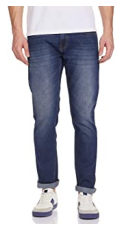

Predicted Label is: [0] 

Input Image is: img _Jeans349.jpeg


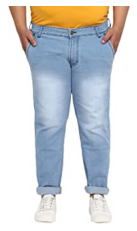

Predicted Label is: [0] 

Input Image is: img _Jeans350.jpeg


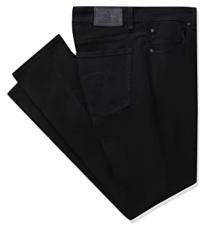

Predicted Label is: [2] 

Input Image is: img _Jeans351.jpeg


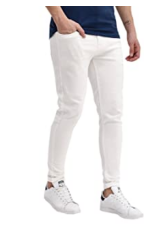

Predicted Label is: [2] 

Input Image is: img _Jeans352.jpeg


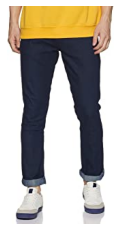

Predicted Label is: [0] 

Input Image is: img _Jeans353.jpeg


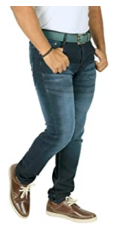

Predicted Label is: [0] 

Input Image is: img _Jeans354.jpeg


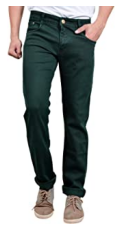

Predicted Label is: [0] 

Input Image is: img _Jeans355.jpeg


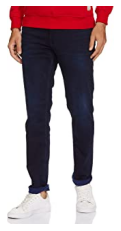

Predicted Label is: [0] 

Input Image is: img _Jeans356.jpeg


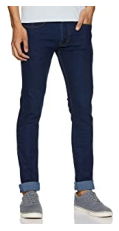

Predicted Label is: [0] 

Input Image is: img _Trousers10.jpeg


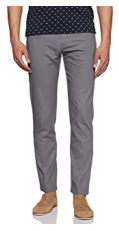

Predicted Label is: [2] 

Input Image is: img _Trousers11.jpeg


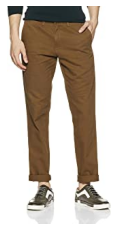

Predicted Label is: [2] 

Input Image is: img _Trousers12.jpeg


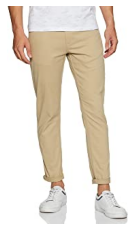

Predicted Label is: [2] 

Input Image is: img _Trousers13.jpeg


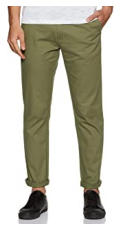

Predicted Label is: [2] 

Input Image is: img _Trousers14.jpeg


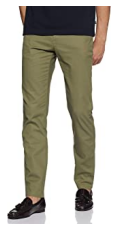

Predicted Label is: [2] 

Input Image is: img _Trousers15.jpeg


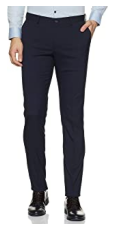

Predicted Label is: [0] 

Input Image is: img _Trousers16.jpeg


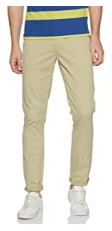

Predicted Label is: [2] 

Input Image is: img _Trousers17.jpeg


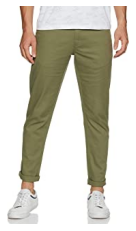

Predicted Label is: [2] 

Input Image is: img _Trousers18.jpeg


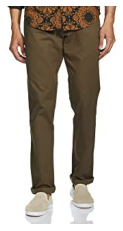

Predicted Label is: [2] 

Input Image is: img _Trousers19.jpeg


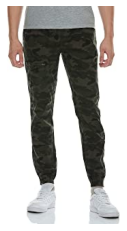

Predicted Label is: [0] 

Input Image is: img _Trousers20.jpeg


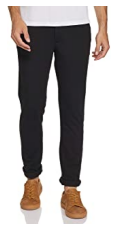

Predicted Label is: [0] 

Input Image is: img _Trousers21.jpeg


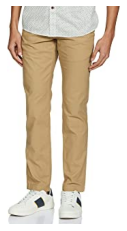

Predicted Label is: [2] 

Input Image is: img _Trousers22.jpeg


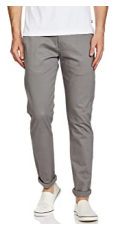

Predicted Label is: [2] 

Input Image is: img _Trousers23.jpeg


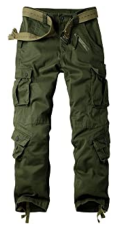

Predicted Label is: [2] 

Input Image is: img _Trousers24.jpeg


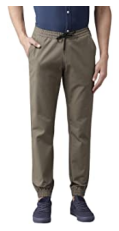

Predicted Label is: [2] 

Input Image is: img _Trousers25.jpeg


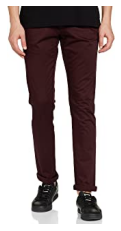

Predicted Label is: [2] 

Input Image is: img _Trousers26.jpeg


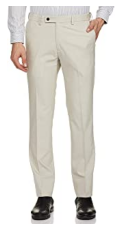

Predicted Label is: [2] 

Input Image is: img _Trousers27.jpeg


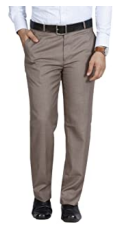

Predicted Label is: [2] 

Input Image is: img _Trousers28.jpeg


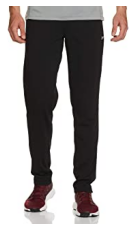

Predicted Label is: [2] 

Input Image is: img _Trousers29.jpeg


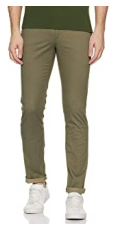

Predicted Label is: [2] 

Input Image is: img _Trousers30.jpeg


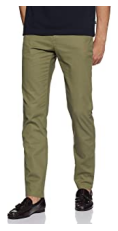

Predicted Label is: [2] 

Input Image is: img _Trousers31.jpeg


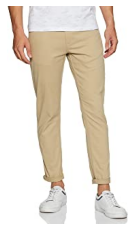

Predicted Label is: [2] 

Input Image is: img _Trousers32.jpeg


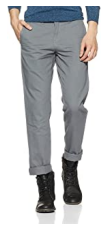

Predicted Label is: [2] 

Input Image is: img _Trousers33.jpeg


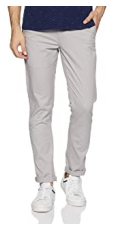

Predicted Label is: [2] 

Input Image is: img _Trousers34.jpeg


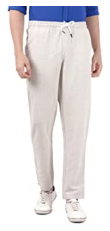

Predicted Label is: [2] 

Input Image is: img _Trousers35.jpeg


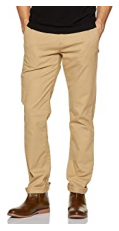

Predicted Label is: [2] 

Input Image is: img _Trousers36.jpeg


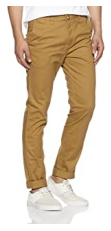

Predicted Label is: [2] 

Input Image is: img _Trousers37.jpeg


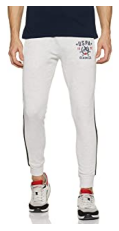

Predicted Label is: [2] 

Input Image is: img _Trousers38.jpeg


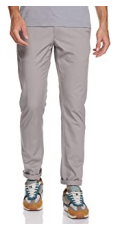

Predicted Label is: [2] 

Input Image is: img _Trousers39.jpeg


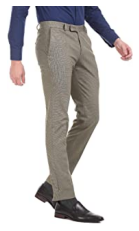

Predicted Label is: [2] 

Input Image is: img _Trousers40.jpeg


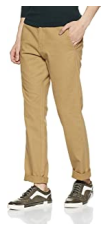

Predicted Label is: [2] 

Input Image is: img _Trousers41.jpeg


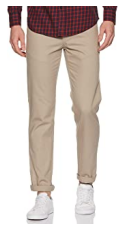

Predicted Label is: [2] 

Input Image is: img _Trousers42.jpeg


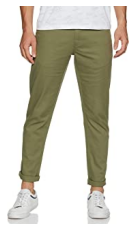

Predicted Label is: [2] 

Input Image is: img _Trousers43.jpeg


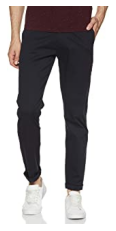

Predicted Label is: [0] 

Input Image is: img _Trousers44.jpeg


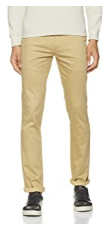

Predicted Label is: [2] 

Input Image is: img _Trousers45.jpeg


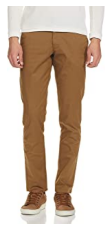

Predicted Label is: [2] 

Input Image is: img _Trousers46.jpeg


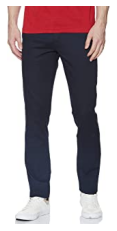

Predicted Label is: [0] 

Input Image is: img _Trousers47.jpeg


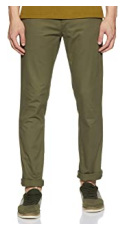

Predicted Label is: [2] 

Input Image is: img _Trousers48.jpeg


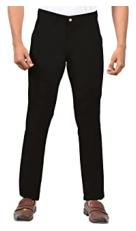

Predicted Label is: [2] 

Input Image is: img _Trousers49.jpeg


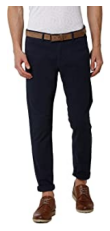

Predicted Label is: [0] 



In [56]:
#Testing our classifier


test_dire=[saree_dir_test,jean_dir_test,trouser_dir_test]

for test_dir in test_dire:
    for i in listdir(test_dir):
        print("Input Image is:",i)
        img= image.load_img('{}/{}'.format(test_dir,i))                         
        test_image = image.load_img('{}/{}'.format(test_dir,i),target_size=(128, 128))
        test_image = image.img_to_array(test_image)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        test_image = np.expand_dims(test_image, axis=0)
        result = saved_model.predict(test_image)
        print("Predicted Label is:",np.argmax(result, axis=1),"\n")